In [1]:
from edgar_prelim import *
import pandas as pd
%load_ext autoreload
%autoreload 2
%matplotlib inline
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

In [2]:
cik='0000004962'

In [3]:
# Parameters
cik = "0000805676"


# Company

In [4]:
cik_df = pd.read_sql(text("select cik, sic, sic_description, company_name, ticker from cik where cik = :cik").bindparams(cik=cik), prelim_engine)
cik_df.rename({'cik': 'CIK', 'sic': 'SIC', 'sic_description': 'Description', 'company_name': 'Name', 'ticker': 'Ticker'}, axis=1).T.rename({0: ''}, axis=1)

,
CIK,0000805676
SIC,6021
Description,NATIONAL COMMERCIAL BANKS
Name,PARK NATIONAL CORP /OH/
Ticker,PRK


In [5]:
prelims = query_prelims(cik)

# Summary Statistics

In [6]:
prelims.groupby('item').item_value.describe()

,count,mean,std,min,25%,50%,75%,max
item,,,,,,,,
book value per share,51.0,4.427843e+01,3.840156e+00,37.93,4.159500e+01,42.88,47.13,5.406000e+01
interest income,58.0,7.946231e+07,1.148600e+07,64342000.00,6.876450e+07,79998500.00,87072000.00,1.043970e+08
net income,59.0,1.854381e+07,1.236956e+07,-43170000.00,1.895750e+07,20889000.00,23426000.00,3.147500e+07
net interest income,59.0,5.985134e+07,8.958858e+06,6193000.00,5.554300e+07,59416000.00,65753500.00,7.002200e+07
provision for loan losses,59.0,6.334576e+06,8.347649e+06,-8349000.00,1.008500e+06,2637000.00,13375000.00,3.261800e+07


# Plots

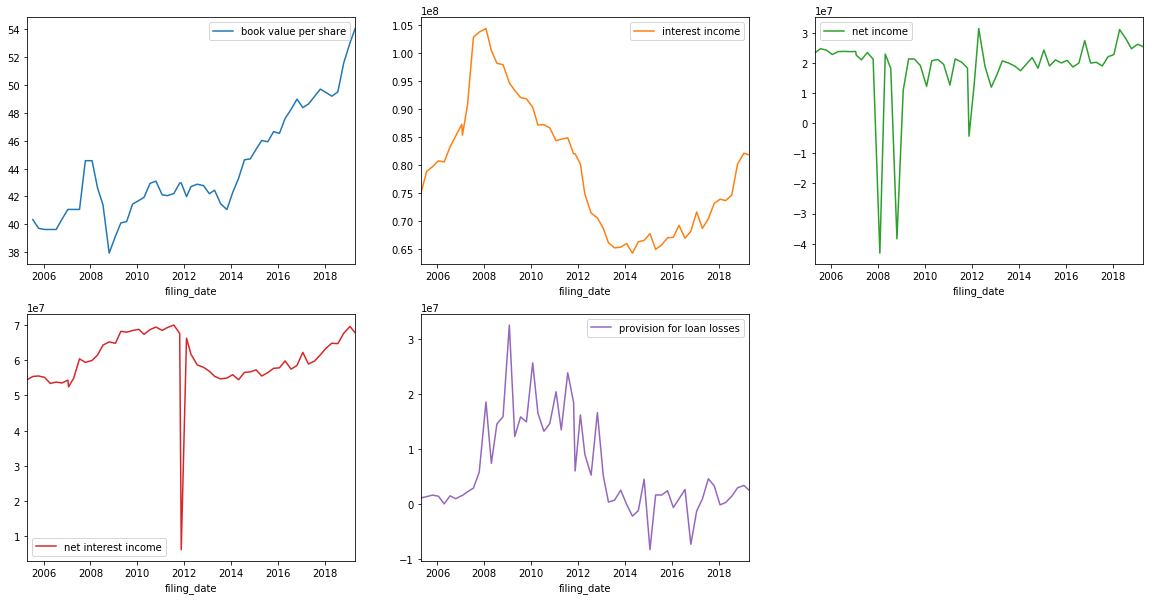

In [7]:
_ = prelims.set_index('filing_date').pivot(columns='item', values='item_value').fillna(method="ffill").plot(subplots=True, layout=(2, 3), figsize=(20, 10), sharex=False)

# Quality

In [8]:
validate_prelims(prelims)

period   msg_type  \
cik        item                                                                
0000805676 book value per share                            2005Q1    missing   
           book value per share       2006Q1 to 2006Q2: 2 periods    missing   
           book value per share       2007Q1 to 2007Q2: 2 periods    missing   
           book value per share                            2007Q4    missing   
           net income                                      2011Q4  duplicate   
           net interest income                             2011Q4  duplicate   
           provision for loan losses                       2011Q4  duplicate   
           total revenue                                     None      empty   

                                                 message  
cik        item                                           
0000805676 book value per share           Missing period  
           book value per share           Missing period  
           book value per share           Missing period  
           book value per share           Missing period  
           net income                   Duplicate period  
           net interest income          Duplicate period  
           provision for loan losses    Duplicate period  
           total revenue              No values for item

# Data

In [9]:
def make_clickable(val: str) -> str: 
    if isinstance(val, str):
        name, url = val.split('#')
        return f'<a href="{url}">{name}</a>'
    else:
        return ''

(prelims
 .assign(fiscal_period = prelims.fiscal_period.str.cat(prelims.filing_href, sep='#'), filing_date = prelims.filing_date.map(lambda d: d.strftime('%Y-%m-%d')))
 .loc[:, ['filing_date', 'fiscal_period', 'item', 'item_value', 'src_table', 'src_row', 'src_column', 'src_value', 'src_units']]
 .set_index(['filing_date', 'item'])
 .style.format({'fiscal_period': make_clickable})
)

In [10]:
#discard_prelim(cik, date(2019, 12, 31))
#force_reload_prelim(cik, date(2019, 12, 31), delete_filings=False)
#force_reload_prelim_between(cik,  start=date(2002, 6, 1), end=date(2019, 12, 31), delete_filings=False)

In [11]:
#d = date(2018, 10, 29)
#extract_prelim_statements(cik, start=d, end=d)

In [12]:
#d = date(2019, 4, 22)
#filings = query_edgar_for_filings(cik, "8-K", start=d, end=d, require_xbrl=False)
#report = query_edgar_for_submission_text(filings[0].href)
#submission = load_submission(report.href)
#tables = list(parse_tables(submission))
#items_from_tables(tables)

In [13]:
#widget = query_prelims_for_override(cik, filing_date='2006-01-27', item=None)
#widget

In [14]:
#widget.save()